In [30]:
import pandas as pd # Data Cleaning, Exploration
import numpy as np # Funções matemáticas
import matplotlib.pyplot as plt # Visualização de dados
import seaborn as sns # Visualização

# Análise Exploratória de Dados
De forma semelhante ao que você fez durante a limpeza dos dados, você deve dar continuidade a sua análise enriquecendo-a com pedaços de texto em Markdown. Semelhante ao que foi feito anteriormente, coloque sua motivação e conduza sua linha de pensamento através dos textos.

**A partir desse e dos próximos notebook, não iremos focar em Markdowns. Todas as células serão explicadas através de comentários**

In [31]:
# Lendo arquivo limpo do notebook anterior
df = pd.read_csv('dados_limpos.csv', encoding='latin1')

In [32]:
# Verificando as cinco primeiras linhas do arquivo
df.head()

ANO  MES  DIA       SENADOR           TIPO_DESPESA            CNPJ_CPF  \
0  2016    1   13  ACIR GURGACZ     Aluguel de imóveis  05.914.650/0001-66   
1  2016    1   18  ACIR GURGACZ     Aluguel de imóveis  05.914.650/0001-66   
2  2016    1    1  ACIR GURGACZ     Aluguel de imóveis      004.948.028-63   
3  2016    1   16  ACIR GURGACZ     Aluguel de imóveis  05.423.963/0001-11   
4  2016    1    1  ACIR GURGACZ  Aquisição de material  62.652.961/0001-38   

                         FORNECEDOR  DOCUMENTO        DATA  \
0  ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA  000011328  2016-01-13   
1  ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA  000011327  2016-01-18   
2     GILBERTO PISELO DO NASCIMENTO     001/16  2016-04-01   
3                     OI MÓVEL S.A.  661639001  2016-01-16   
4               AGÊNCIA ESTADO S.A.   00608918  2016-06-01   

                                        DETALHAMENTO  VALOR_REEMBOLSADO  \
0  Despesa com pagamento de energia elétrica para...              73.60   
1  Pagamento de energia elétrica para o escritóri...             206.84   
2  Despesa com pagamento de aluguel, utilizado pa...            6000.00   
3  despesa com pagamento de telefonia para o escr...             407.48   
4  Aquisição de publicação virtual de conteúdo jo...             550.00   

   MAIOR_QUE_100  
0              0  
1              1  
2              1  
3              1  
4              1

In [33]:
# Verificando como o Pandas está interpretando cada colunas
df.dtypes

ANO                    int64
MES                    int64
DIA                    int64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
MAIOR_QUE_100          int64
dtype: object

In [34]:
# O Pandas não interpretou a coluna DATA como data, vamos convertê-la agora
df['DATA'] = pd.to_datetime(df['DATA'])

In [35]:
# O comando describe irá pegar todas as colunas numéricas e gerar algumas estatísticas para nós
df.describe()

ANO           MES           DIA  VALOR_REEMBOLSADO  MAIOR_QUE_100
count  26691.0  26691.000000  26691.000000       26691.000000   26691.000000
mean    2016.0      6.470908     15.431419         947.484513       0.784085
std        0.0      3.257134      8.847378        2733.820037       0.411464
min     2016.0      1.000000      1.000000           0.010000       0.000000
25%     2016.0      4.000000      8.000000         124.000000       1.000000
50%     2016.0      6.000000     15.000000         324.790000       1.000000
75%     2016.0      9.000000     23.000000         956.865000       1.000000
max     2016.0     12.000000     31.000000      256980.000000       1.000000

In [36]:
# Selecionando dados com multiplas condições

# Utilizando o comando .loc, você pode passar várias condições para selecionar linhas. Lembre-se de colocar cada
# condição entre parenteses e de utilizar o operador | para OR e & para AND.

# Aqui, selecionamos todas as linhas que tem VALOR_REEMBOLSADO igual a 0.01 ou maior que 200 mil
df.loc[(df['VALOR_REEMBOLSADO'] == 0.01) | (df['VALOR_REEMBOLSADO'] >= 200000)]

ANO  MES  DIA                        SENADOR TIPO_DESPESA  \
4637   2016   12   22                DAVI ALCOLUMBRE  Publicidade   
6847   2016    3   22        FERNANDO BEZERRA COELHO     Passagem   
6848   2016    3   30        FERNANDO BEZERRA COELHO     Passagem   
11278  2016    6    6                    JORGE VIANA     Passagem   
11494  2016   12   17                    JORGE VIANA     Passagem   
18749  2016    6   21  PEDRO CHAVES DOS SANTOS FILHO     Passagem   
23302  2016    3   31                  TELMÁRIO MOTA     Passagem   

                 CNPJ_CPF                                 FORNECEDOR  \
4637   04.953.008/0001-23  ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME   
6847   07.575.651/0001-59                                        GOL   
6848   07.575.651/0001-59                                        GOL   
11278  33.937.681/0001-78                                      LATAM   
11494  07.575.651/0001-59                 GOL TRANSPORTES AÉREOS S/A   
18749  12.281.922/0001-01      Via Berrini Turismo e Eventos Ltda ME   
23302  11.489.244/0001-04                        CONTINENTAL TURISMO   

        DOCUMENTO       DATA  \
4637          202 2017-03-22   
6847       NFPJ4Z 2016-03-22   
6848       OEI85P 2016-03-30   
11278      3EY28M 2016-02-06   
11494      NCNMYL 2016-10-17   
18749  FT00020270 2016-07-21   
23302      BGNV5G 2016-03-31   

                                            DETALHAMENTO  VALOR_REEMBOLSADO  \
4637                                                 NaN          256980.00   
6847   Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...               0.01   
6848   Companhia Aérea: GOL, Localizador: OEI85P. Pas...               0.01   
11278  Companhia Aérea: LATAM, Localizador: 3EY28M. P...               0.01   
11494  Companhia Aérea: GOL, Localizador: NCNMYL. Pas...               0.01   
18749  Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...               0.01   
23302  Companhia Aérea: GOL, Localizador: BGNV5G. Pas...               0.01   

       MAIOR_QUE_100  
4637               1  
6847               0  
6848               0  
11278              0  
11494              0  
18749              0  
23302              0

In [37]:
# Vamos selecionar todas as linhas em que o TIPO_DESPESA é Publicidade e usar o describe para
# gerar estatísticas
df.loc[df['TIPO_DESPESA'] == 'Publicidade'].describe()

ANO          MES          DIA  VALOR_REEMBOLSADO  MAIOR_QUE_100
count  1083.0  1083.000000  1083.000000        1083.000000    1083.000000
mean   2016.0     6.747922    15.841182        3310.679400       0.986150
std       0.0     3.434922     8.707863        9795.249986       0.116924
min    2016.0     1.000000     1.000000          24.650000       0.000000
25%    2016.0     4.000000     8.000000         853.500000       1.000000
50%    2016.0     7.000000    15.000000        2000.000000       1.000000
75%    2016.0    10.000000    24.000000        3000.000000       1.000000
max    2016.0    12.000000    31.000000      256980.000000       1.000000

In [38]:
# Utilizando a função groupby, pode agregar nossos dados por uma ou mais colunas (como SENADOR abaixo)
# Podemos então utilizar algumas funções, como sum()
gastos_de_senadores = df.groupby('SENADOR')
gastos_de_senadores = gastos_de_senadores['VALOR_REEMBOLSADO'].sum()

# Data Visualization

Existem diversas fontes que podem ajudá-lo a criar as melhores visualizações para seus trabalhos. Abaixo, coloquei algumas boas fontes de materiais para complementar seus estudos.

* **O site LearnUI oferece uma ferramenta incrível para criação de paleta de cores**: <br>
https://learnui.design/tools/data-color-picker.html
* **Esse post no Medium explica um pouco sobre como é a percepção humana a cores e formas**:<br> https://medium.com/@kennelliott/39-studies-about-human-perception-in-30-minutes-4728f9e31a73
* **O FlatUI colors também oferece várias paletas de cores**: <br>
https://flatuicolors.com
* **O site Python Graph Gallery oferece uma coleção de dicas sobre quando e como utilizar diferentes gráficos em Python**:<br>
https://python-graph-gallery.com/
* **O site Dataviz Project oferece de forma semelhante ao anterior algumas dicas para estudos de visualização de dados**: <br>
http://datavizproject.com

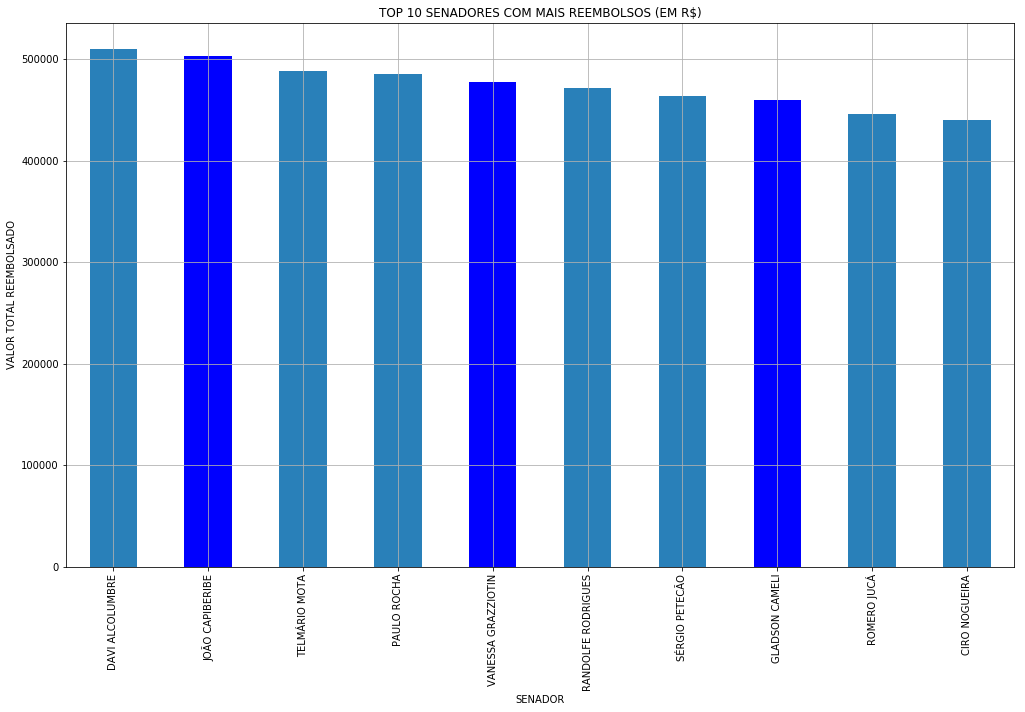

In [39]:
# Aqui nós iremos gerar um gráfico de barras, onde o eixo X será os 10 senadores com maiores valores reembolsados
# As \ que você vê permite que você quebre a linha sem que o código gere erro. O caracter de \ no Python é o caracter 
# de escape, ou seja, o próximo caracter a frente dele (no caso, uma quebra de linha) não é interpretado pelo Python
gastos_de_senadores.sort_values(ascending=False)\
                   .head(10)\
                   .plot(grid=True, kind='bar', figsize=(17,10), color=['#2980b9', 'blue'])

# Vamos atribuir um título para o gráfico
plt.title('TOP 10 SENADORES COM MAIS REEMBOLSOS (EM R$)')
# Em seguida, vamos dar um nome a label do eixo Y
plt.ylabel('VALOR TOTAL REEMBOLSADO')
# O comando plt.show() irá exibir o gráfico
plt.show()

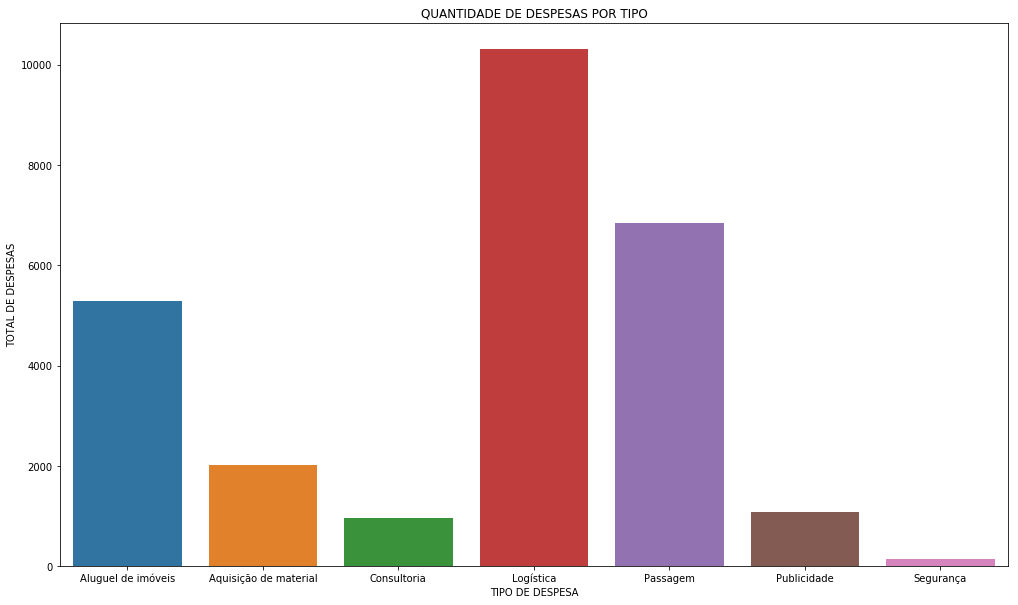

In [40]:
# Ao utilizamos a função plt.figure(), pode definir, antes de escrever o código do gráfico, que tamanho ele
# ocupará na tela (utilizando o argumento figsize)
plt.figure(figsize=(17,10))
# Em seguida, geramos um gráfico de countplot, que irá contar quantas vezes um determinado dado apareceu. O dado,
# nesse caso, é o TIPO_DESPESA.
sns.countplot(data=df, x='TIPO_DESPESA')

# Adicionando título
plt.title('QUANTIDADE DE DESPESAS POR TIPO')
# Adicionando label ao eixo X
plt.xlabel('TIPO DE DESPESA')
# Adicionando label ao eixo Y
plt.ylabel('TOTAL DE DESPESAS')
# Exibindo gráfico
plt.show()

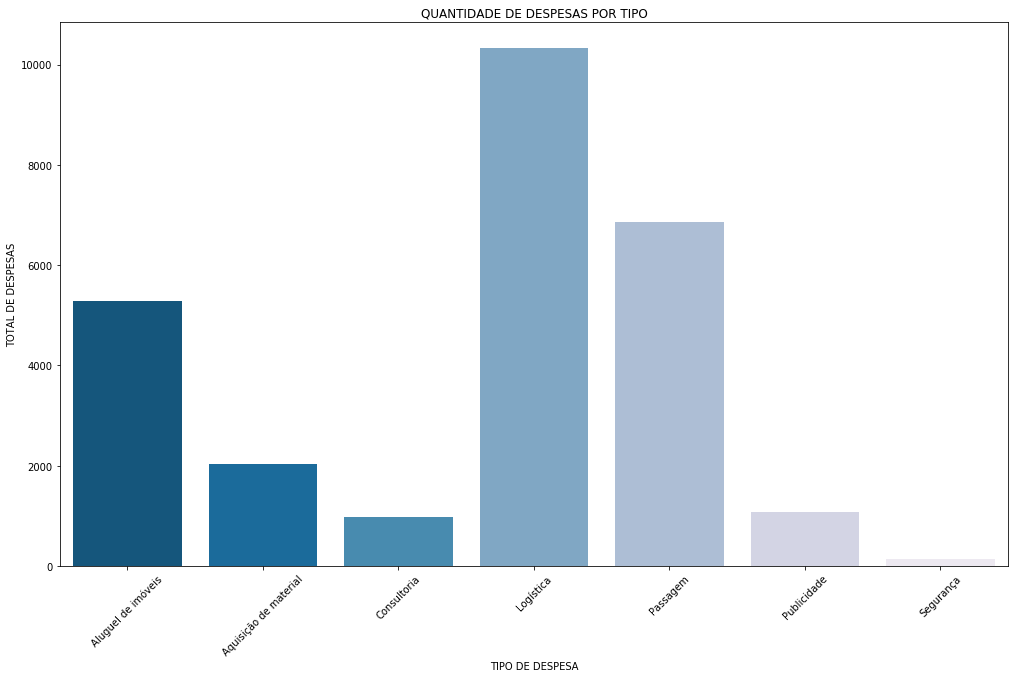

In [41]:
plt.figure(figsize=(17,10))
# Criando um novo gráfico de barras, mas agora utilizando a paleta 'BuGn'
sns.countplot(data=df, x='TIPO_DESPESA', palette='PuBu_r')

plt.title('QUANTIDADE DE DESPESAS POR TIPO')
plt.xlabel('TIPO DE DESPESA')
# Utilizando a função xticks para rodar os rótulos do eixo X
plt.xticks(rotation=45)
plt.ylabel('TOTAL DE DESPESAS')
plt.show()

# Formatando datas em Python

Quando trabalhamos com datas em Python e Pandas, temos acesso a uma série de funções voltadas para esse tipo de dados. No Pandas, podemos utilizar o método `.dt` para, por exemplo, extrair o ano e mês da coluna `DATA`.

Outras funções úteis com datas:

`df[COLUNA].dt.day`: extrai o **dia** do campo de data<br>
`df[COLUNA].dt.month`: extrai o **mês** do campo de data<br>
`df[COLUNA].dt.date`: extrai a **data** do campo de data, não considerando, por exemplo, hora.<br>

Confira as principais funções de data do Pandas:<br>
**https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html#datetimelike-properties**

Leia nessa documentação algumas das outras propriedades de datas com Python: <br>
**https://docs.python.org/2/library/datetime.html**

In [42]:
# Extraindo o ano e mês de cada linha
df['ANO_MES'] = df['DATA'].dt.strftime('%Y-%m')

In [43]:
# Vamos criar um mapa de calor
# Neste primeiro momento, vamos criar uma tabela pivotada, que nada mais é que uma tabela onde as linhas, colunas
# e valores são definidos e agrupados por nós

df_pivot = df.pivot_table(index='ANO_MES', # Usaremos o ano-mês como índice
                          columns='TIPO_DESPESA', # cada coluna representará um tipo de despesa
                          values='VALOR_REEMBOLSADO', # Enquanto os valores serão o VALOR_REEMBOLSADO
                          aggfunc=np.sum, # para cada coluna e cada linha, somaremos o valor de reembolso
                          fill_value=0)
df_pivot.head()

TIPO_DESPESA  Aluguel de imóveis  Aquisição de material  Consultoria  \
ANO_MES                                                                
1977-10                      0.0                    0.0          0.0   
1986-03                      0.0                    0.0          0.0   
2012-02                    162.4                    0.0          0.0   
2013-09                      0.0                    0.0          0.0   
2014-01                      0.0                    0.0          0.0   

TIPO_DESPESA  Logística  Passagem  Publicidade  Segurança  
ANO_MES                                                    
1977-10          152.51      0.00          0.0        0.0  
1986-03          139.16      0.00          0.0        0.0  
2012-02            0.00      0.00          0.0        0.0  
2013-09          675.00      0.00          0.0        0.0  
2014-01            0.00    374.83          0.0        0.0

In [44]:
# Vamos filtrar apenas dados de 2016
df_pivot = df_pivot.loc['2016-01':'2016-12']

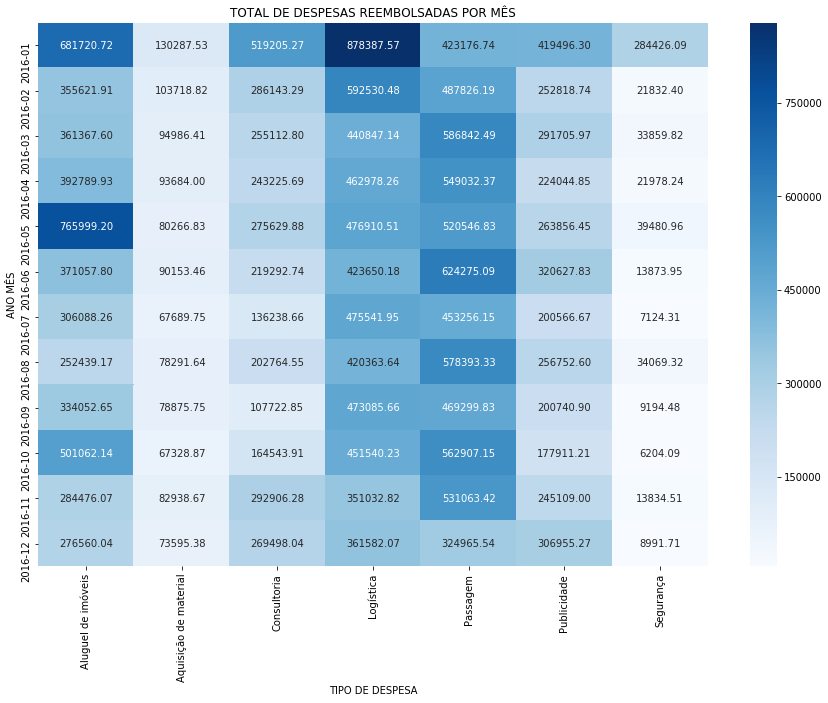

In [45]:
# Por fim, vamos criar um mapa de calor
plt.figure(figsize=(15,10))
sns.heatmap(df_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title('TOTAL DE DESPESAS REEMBOLSADAS POR MÊS')
plt.xlabel('TIPO DE DESPESA')
plt.ylabel('ANO MÊS')
plt.show()

# Conclusão
Adicione uma conclusão ao final do seu trabalho. Compartilhe suas decisões e respostas finais, isso fará com que pessoas que leiam seu estudo posso entender quais são os próximos passos para melhorá-lo e saber que resultados você atingiu com ele.